In [17]:
"""

This is a K-NEAREST-NEIGHBOUR module.


To use this module
Command:
   >> import knn

1. Create an object
   >> stat = knn.det( matrix of (m examples X n features ),matrix of (m output examples X 1) )
   Output labels can be any number or strings.

2. Get an suggested k value.
   >> stat.plotKvsacc( matrix of (p test example X n features)  , matrix of (m output examples X 1, number of classes) ,Last integer value of k to which testing is desired)
   
3. To predict output
   >> y_predt = stat.getclass(matrix of (p test example X n features) , value of k (default = number of classes + 1))
   
4. To determine accuracy
   >> accuracy = stat.accuracy(X_test,y_test)
   
"""

'\n\nThis is a K-NEAREST-NEIGHBOUR module.\n\n\nTo use this module\nCommand:\n   >> import knn\n\n1. Create an object\n   >> stat = knn.det( matrix of (m examples X n features ),matrix of (m output examples X 1) )\n   Output labels can be any number or strings.\n\n2. Get an suggested k value.\n   >> stat.plotKvsacc( matrix of (p test example X n features)  , matrix of (m output examples X 1, number of classes) ,Last integer value of k to which testing is desired)\n   \n3. To predict output\n   >> y_predt = stat.getclass(matrix of (p test example X n features) , value of k (default = number of classes + 1))\n   \n4. To determine accuracy\n   >> accuracy = stat.accuracy(X_test,y_test)\n   \n'

In [18]:
 # EXAMPLE -

In [19]:
import numpy as np
import pandas as pd
import knn as knn
import matplotlib.pyplot as plt


In [20]:
# importing data

file = pd.read_csv('corners.txt',header=None,sep=' ')

data = np.array(file.values)

X = data[:,0:2]
y = data[:,2:3]

In [21]:
# shuffling data

def shuffle(a, b):
  assert len(a)== len(b) 
  p = np.random.permutation(len(a))
  return a[p], b[p]
X,y = shuffle(X,y)

In [22]:
# dividing into training and test set

m = np.shape(X)[0]
X_train = X[0:int(0.7*m),:]
y_train = y[0:int(0.7*m)]
X_test = X[int(0.7*m):,:]
y_test = y[int(0.7*m):]

In [23]:
# creating object  ( feature matrix , output matrix )

stat = knn.det(X_train,y_train)

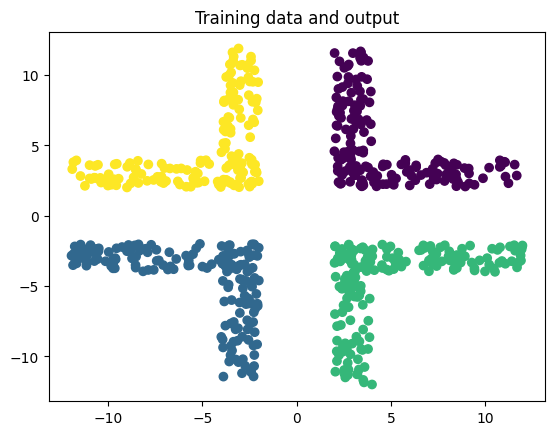

In [24]:
# visualising training data

t = np.reshape(y_train,(np.shape(y_train)[0]))
plt.scatter(X_train[:,0],X_train[:,1],c=t)
plt.title('Training data and output')
plt.show()

In [25]:
# predicting output for test set

y_predt = stat.getclass(X_test)

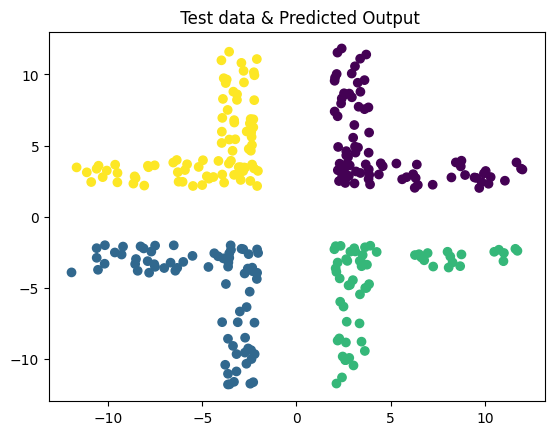

In [26]:
# visualising test data and predicted output

t = np.reshape(y_predt,(np.shape(y_predt)[0]))
plt.scatter(X_test[:,0],X_test[:,1],c=t)
plt.title(' Test data & Predicted Output')
plt.show()

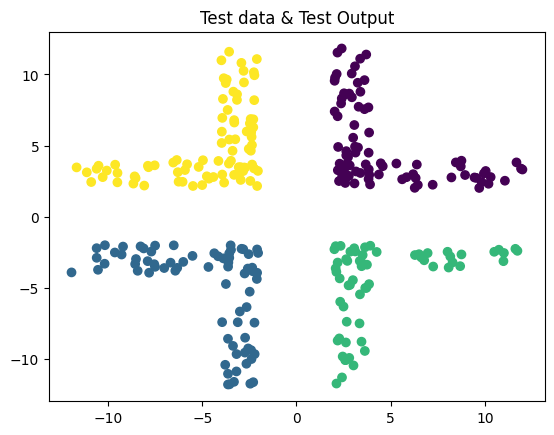

In [27]:
# visualising test data and test output

t = np.reshape(y_test,(np.shape(y_test)[0]))
plt.scatter(X_test[:,0],X_test[:,1],c=t)
plt.title('Test data & Test Output')
plt.show()

In [28]:
# determining accuracy

print (stat.accuracy(X_test,y_test),'%')

100.0 %


In [29]:
# comparing with sklearn

from sklearn.neighbors import KNeighborsClassifier
t = np.reshape(y_train,(np.shape(y_train)[0],))
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,t)
predicted= model.predict(X_test)
t = np.reshape(y_test,(np.shape(y_test)[0],))
k = (predicted==t)
k = k.astype(int)
print (np.sum(k)*100.0/np.shape(t)[0],'%')

100.0 %
